# Part II - Flights
## by Abdullah S. Othman

## Investigation Overview
This presentation explores the flights dataset that reports cancelled and delayed flights in the United States with the reasons for cancellation and delays




## Dataset Overview

The dataset has 1,280,423 flight details with 109 features.

The variables in the dataset contains information about flights' origin, departure, date and time, duration, cancellation status, delay (and cause of delay), etc.

Also, a flight is considered delayed when its arrival delay is longer than 15 minutes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Flights_df = pd.read_csv("airline_2m.csv", encoding='ISO-8859-1')
Flights_df = Flights_df[Flights_df['Year'] > 2000]
Flights_df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2006,3,8,7,1,2006-08-07,CO,19704,CO,N27724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cancelled flights
### Proportion of cancelled flights

Out of 1.2 million flights , 23k flights (1.86%) were cancelled.

Text(0.5, 1.0, 'Proportion of Cancelled flights')

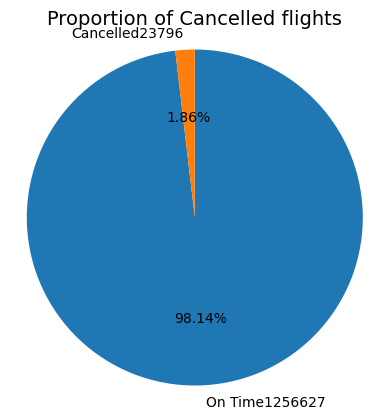

In [3]:
cancelled_flights = Flights_df['Cancelled'].value_counts()
labels = f'On Time{cancelled_flights.values[0]}', f'Cancelled{cancelled_flights.values[1]}'
plt.pie(cancelled_flights, labels=labels, startangle=90, counterclock=False, autopct='%.2f%%')
plt.axis('square')
plt.title('Proportion of Cancelled flights', fontsize=14)

## Distribution of Cancelled flights by reason

- Most of the flights (41.88%) were cancelled due to NSA reasons followed by Carrier reasons (34.64%).
- Security reasons account the negligible proportion (4.94%) of cancelled flights.

Text(0.5, 1.0, 'Distribution of Cancelled flights')

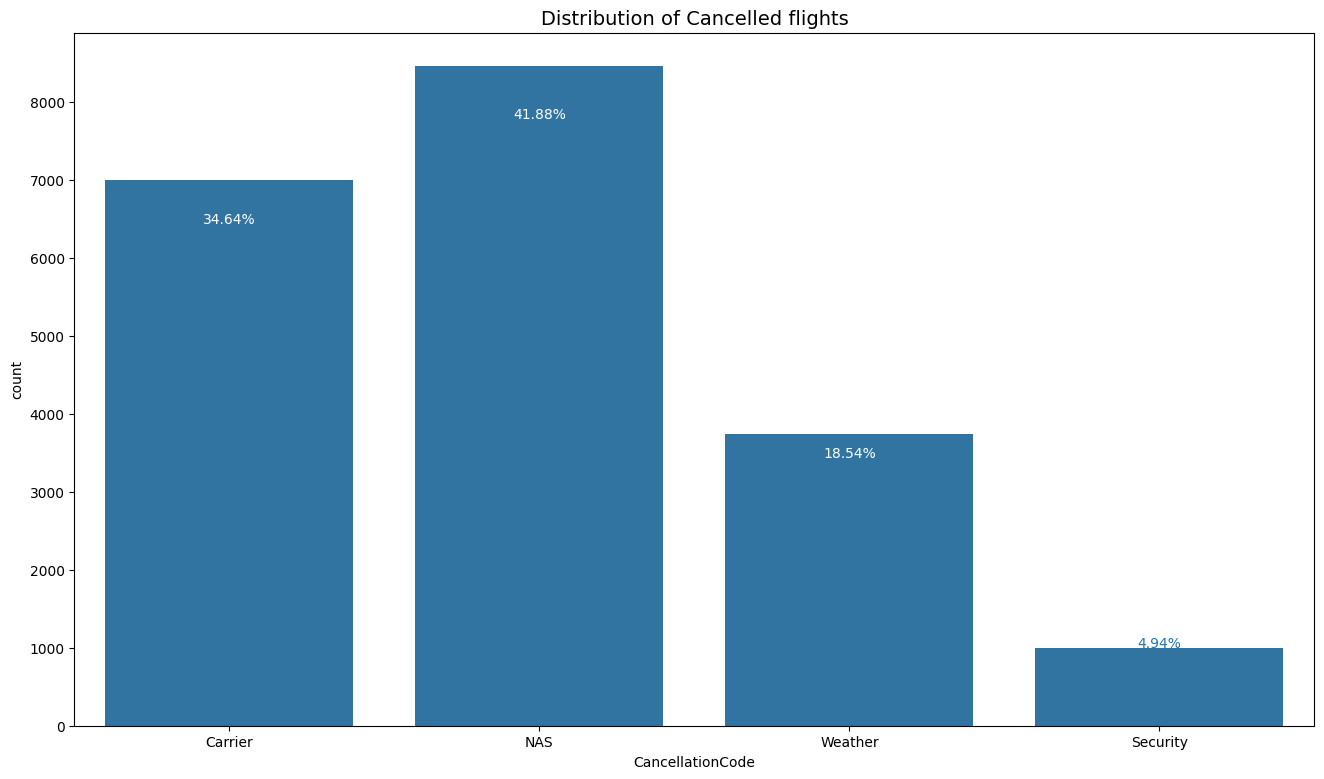

In [4]:
plt.figure(figsize=(16, 9))
base_color = sb.color_palette()[0]
# df_cancelled = df.query('(Cancelled==1)')
sb.countplot(data=Flights_df, x='CancellationCode', color=base_color)
# add annotations
gen_counts = Flights_df['CancellationCode'].value_counts()
# take proportion only out of Cancelled flights, not total dataframe
n_points = gen_counts.sum()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    pct_string = f'{100*count/n_points:0.2f}%'
    # print the annotation just below the top of the bar
    if count > 2000:
        # print the annotation just below the top of the bar
        plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'w')
    else:
        plt.text(loc, 1000, pct_string, ha = 'center', color = base_color)

cancel_codes = ['Carrier', 'NAS', 'Weather', 'Security']
plt.xticks(locs, cancel_codes)
plt.title('Distribution of Cancelled flights', fontsize=14)

## Proportion of delays by delay cause

The maximum proportion (38.4%) of delay is caused by Late Aircraft. The Late Aircraft delay also causes the maximum average delay (~22min).

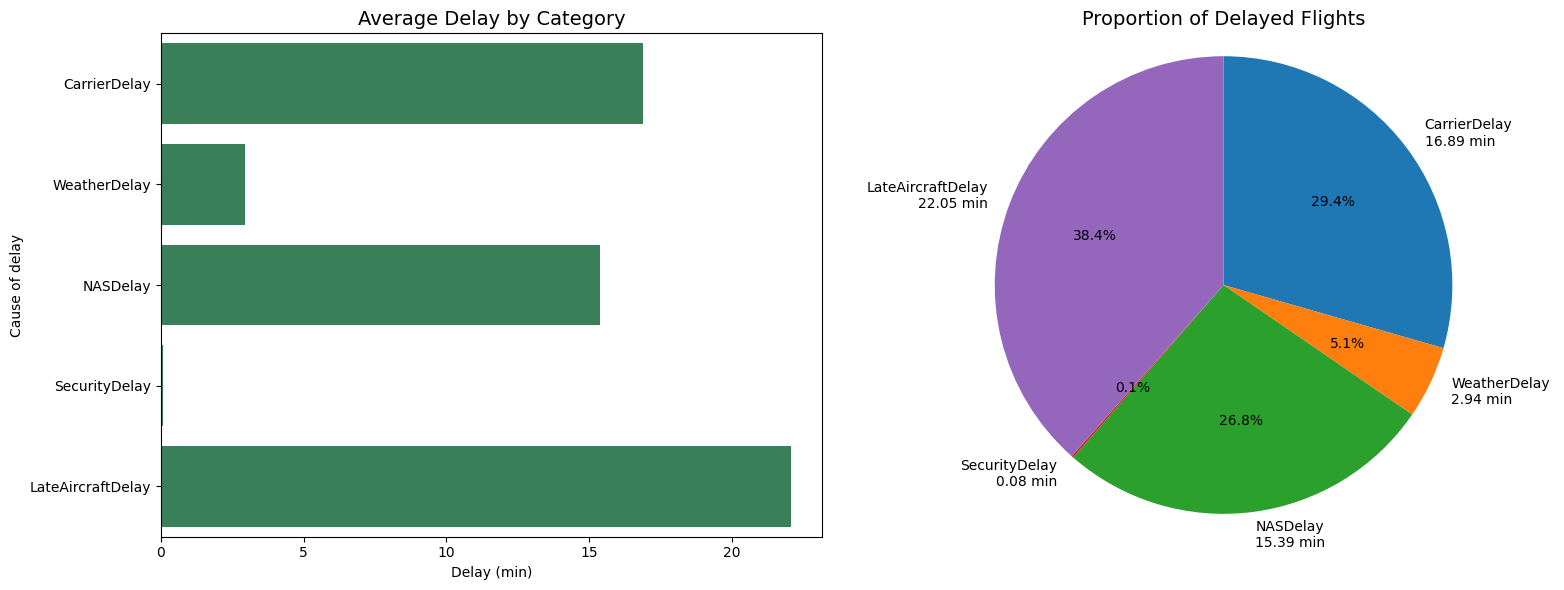

In [5]:
delayed_flights = Flights_df[Flights_df['ArrDelay']>=15]
# Create the figure
plt.figure(figsize=(16, 6))

# Subplot 1: Bar plot for average delay by category
plt.subplot(1, 2, 1)
# Calculate the means for each delay type
means = [delayed_flights[i].mean() for i in ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
# Plot the barplot
sb.barplot(x=means, y=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], color='seagreen')
plt.xlabel('Delay (min)')
plt.ylabel('Cause of delay')
plt.title('Average Delay by Category', fontsize=14)

# Subplot 2: Pie chart for the proportion of delay causes
plt.subplot(1, 2, 2)
labels = [f'{j}\n{means[i]:.2f} min' for i, j in enumerate(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])]
plt.pie(means, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.title('Proportion of Delayed Flights', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()



## Delayed flights by year, month and day
- On Friday, the maximum proportion (21.4%) of flights were delayed.
- December has 23.2% (maximum) of flights delayed.
- The minimum flights take place on Saturday.

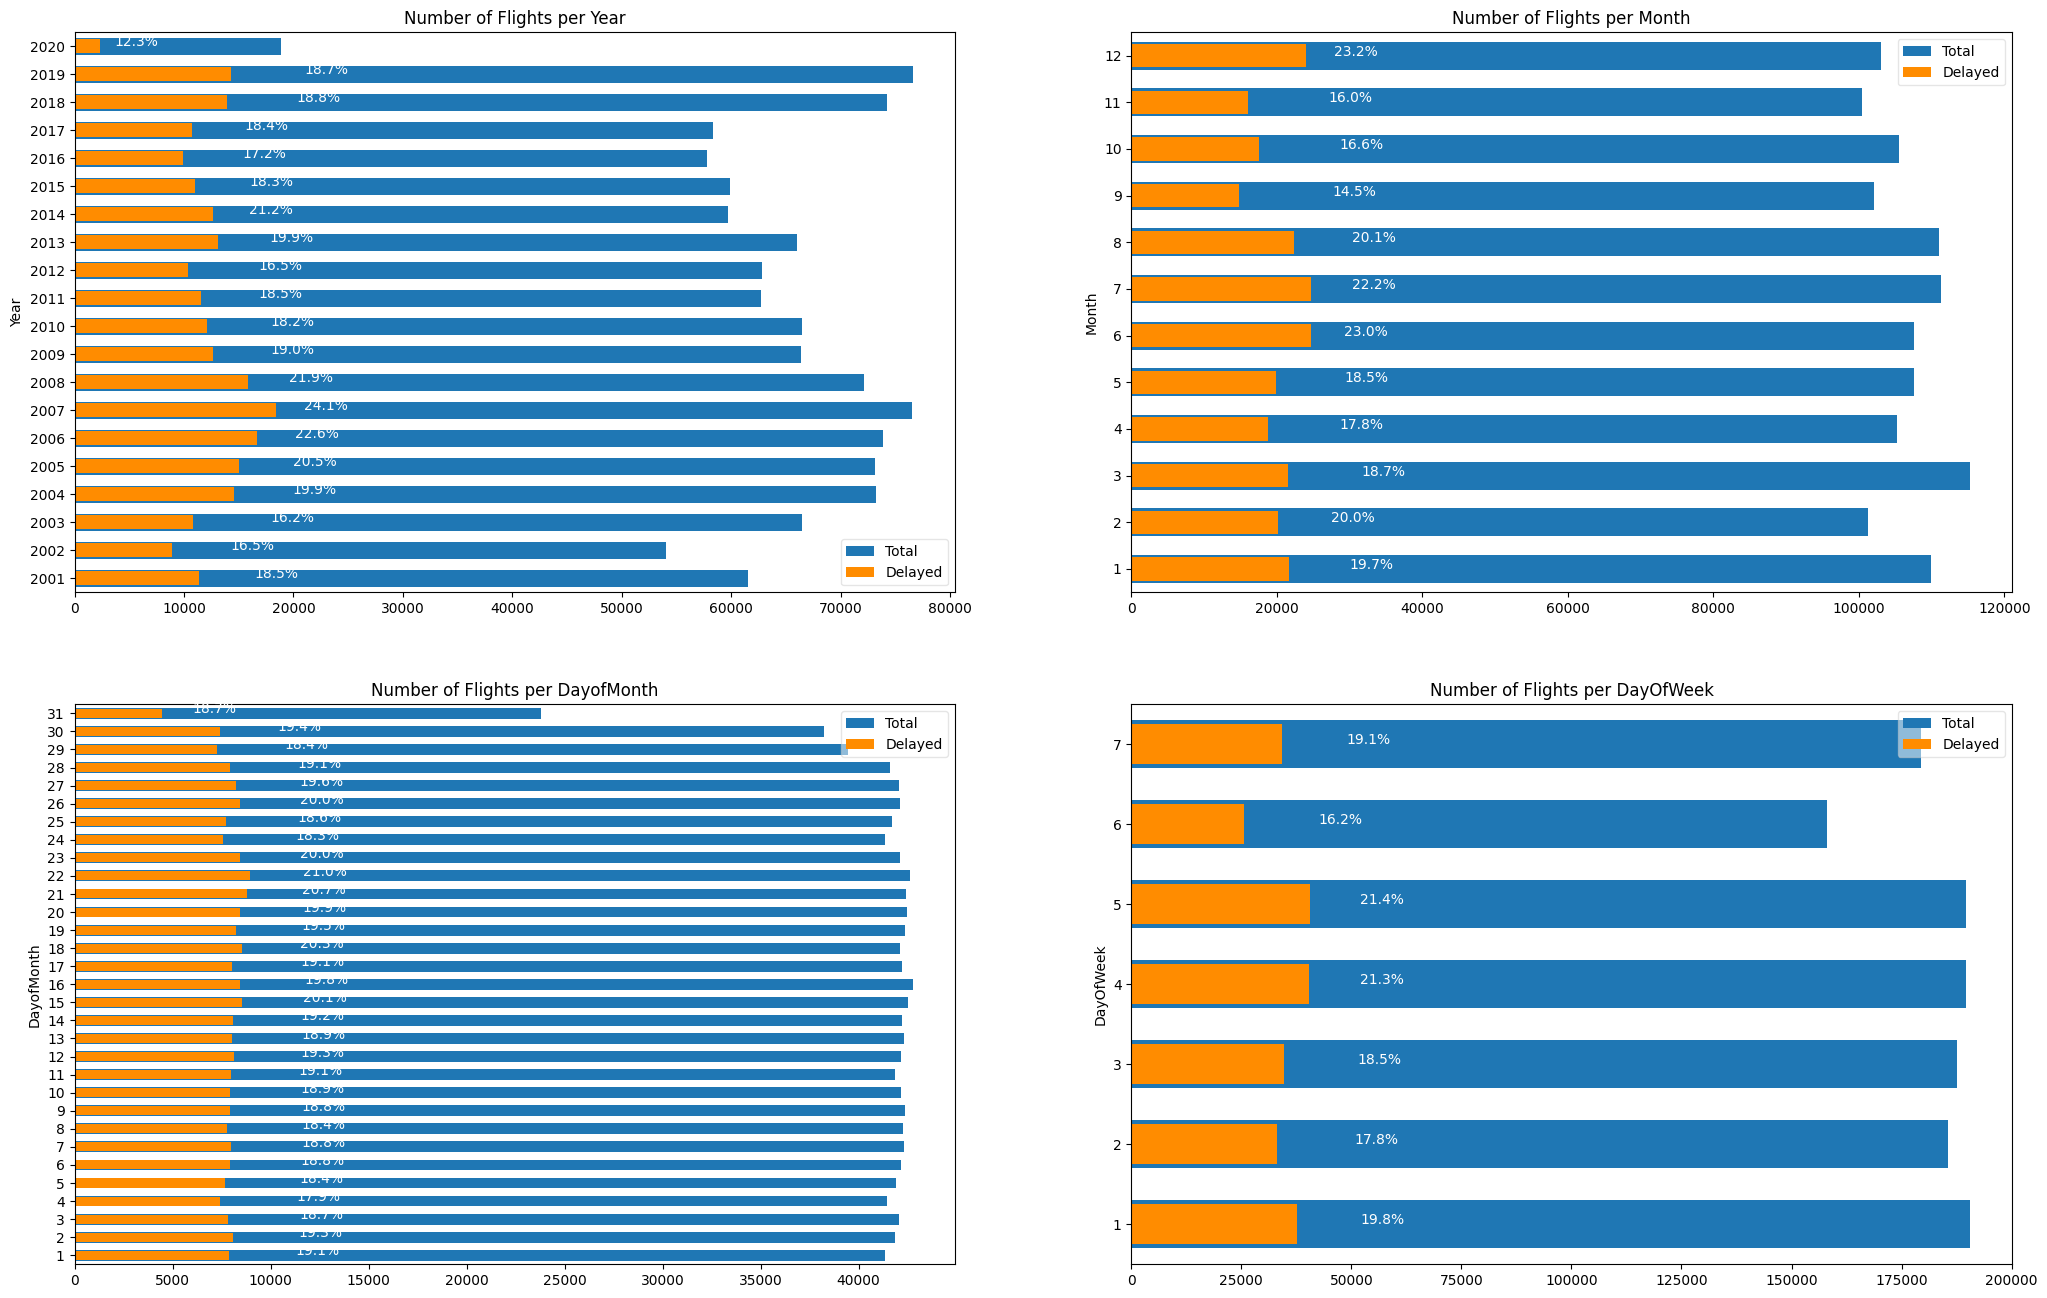

In [6]:
f=plt.figure(figsize=(25, 16))
base_color = sb.color_palette()[0]
n_points = Flights_df.shape[0]
for i, j in enumerate(['Year', 'Month', 'DayofMonth', 'DayOfWeek']):
    plt.subplot(2, 2, i+1)

    # get counts of total and delayed flights
    gen_counts = Flights_df[j].value_counts()
    delayed_gen_counts = delayed_flights[j].value_counts()

    # plot stacked bar charts (reindex or use barplot's order)
    gen_counts.sort_index().plot.barh(label='Total', width=.6)
    delayed_gen_counts.sort_index().plot.barh(label='Delayed', color='darkorange')

    locs, labels = plt.yticks() # get the current tick locations and labels
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        # get the text property for the label to get the correct count
        count = gen_counts[int(label.get_text())]
        delayed_count = delayed_gen_counts[int(label.get_text())]
        pct_string = f'{100*delayed_count/count:0.1f}%'
        # print the annotation just below the top of the bar
        plt.text(0.30*count, loc, pct_string, ha = 'center', color = 'w')
    plt.legend(framealpha = 0.5, fancybox=True)
    plt.title(f'Number of Flights per {j}')